# Overview

This is my solution from the course project of IBM [Supervised Machine Learning: Classification](https://www.coursera.org/learn/supervised-machine-learning-classification) course. The Dataset used was the [Breast Cancer Wisconsin (Diagnostic)](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) downloaded from Kaggle.

The dataset contains characteristics of cell nuclei obtained from digitized images of breast masses which are:
- radius (mean of distances from center to points on the perimeter
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

For each feature was computed the mean, standard error, and "worst" or largest (mean of the three largest values). In addition, the dataset contains an ID for each patient and the type of cancer (M = malignant, B = benign).

The main objective is: **train a classification model to predict the cancer diagnosis based on these cell characteristics**. I also interested on interpretability to understand which features contributes to a better diagnosis.

These and other analyzes related to the [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning) can be accessed in this [repository](https://github.com/vinitg96/Atividades_Diversas/tree/main/IBM_Machine%20Learning_Professional_Certificate).



# Necessary packages

In [3]:
#Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Auto EDA -- !pip install dataprep -- 
#from dataprep.eda import create_report

#Machine Learning
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#Options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

/home/vinicius/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Glimpse on Data

In [4]:
PATH = "../data/"

In [6]:
#loading dataframe
df_raw = pd.read_csv(PATH+"breast_cancer.csv")

#create a copy to avoid edit raw data 
df = df_raw.copy()

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.40,0.006,0.049,0.054,0.016,0.030,0.006,25.38,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.08,0.005,0.013,0.019,0.013,0.014,0.004,24.99,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.03,0.006,0.040,0.038,0.021,0.022,0.005,23.57,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.23,0.009,0.075,0.057,0.019,0.060,0.009,14.91,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.44,0.011,0.025,0.057,0.019,0.018,0.005,22.54,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077,NaN


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.111,0.116,0.244,0.139,0.173,0.056,1.176,1.256,7.673,158.70,0.010,0.029,0.052,0.025,0.011,0.004,25.450,26.40,166.10,2027.0,0.141,0.211,0.411,0.222,0.206,0.071,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.098,0.103,0.144,0.098,0.175,0.055,0.765,2.463,5.203,99.04,0.006,0.024,0.040,0.017,0.019,0.002,23.690,38.25,155.00,1731.0,0.117,0.192,0.322,0.163,0.257,0.066,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.085,0.102,0.093,0.053,0.159,0.056,0.456,1.075,3.425,48.55,0.006,0.037,0.047,0.016,0.013,0.004,18.980,34.12,126.70,1124.0,0.114,0.309,0.340,0.142,0.222,0.078,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.118,0.277,0.351,0.152,0.240,0.070,0.726,1.595,5.772,86.22,0.007,0.062,0.071,0.017,0.023,0.006,25.740,39.42,184.60,1821.0,0.165,0.868,0.939,0.265,0.409,0.124,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.053,0.044,0.000,0.000,0.159,0.059,0.386,1.428,2.548,19.15,0.007,0.005,0.000,0.000,0.027,0.003,9.456,30.37,59.16,268.6,0.090,0.064,0.000,0.000,0.287,0.070,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#checking id
len(df.id.unique()) == df.shape[0]

True

In [ ]:
#checking diagnosis
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

- Id contains a unique value for each observation. This kind of feature is not useful for Machine Learning models. I delete it.
- Diagnosis is the unique not numerical feature. I encode it with 0 mean "B" and 1 mean "M".
- Unnamed: 32 has only missing data.

In [ ]:
#preprocessing
df = df.drop(["id","Unnamed: 32"], axis = 1)
df.diagnosis = df.diagnosis.map({"B":0, "M":1})

I always like to start the analysis with an auto EDA tool to give a first look on data and and get quick insights. Here I use [dataprep](https://dataprep.ai/) for this purpose. 

In [ ]:
#this code export a html file with dataprep output which can be opened locally by any browser 
report = create_report(df, title='Cancer Detection')
report.save("Cancer Detection.html")

Report has been saved to Cancer Detection.html!


Here are some discoveries:
- The target class is unbalanced (62.74% Benign and 37.26% Malign) 
- There are many features with skewness.
- There are several features (Radius, Perimeter, Area, Compactness, Concavity) that seem to separate the classe well. I could bet that a simple linear classifier like a Logistic Regression would do a good job devide the the separability of classes.
- For that features a great value in them are associated to malign cancer.
- Many features with high degree of correlation (>70%) with target
- There are high degree of multicolinearity between predictor features. Eliminate them could lead to a more simple model and simple to interpret due to the fewer features.
- There are some outilers, two observation in concavity worst for example are very far from others


# Exploratory Data Analysis

## Bivariate Analysis

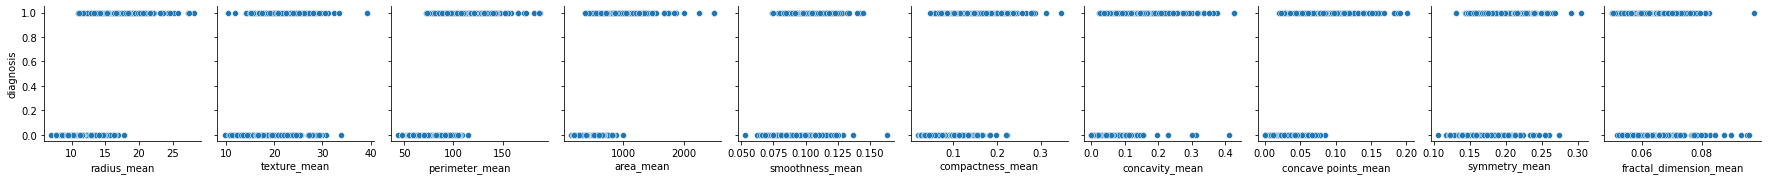

In [ ]:
#_mean pairplot
sns.pairplot(data = df , x_vars =[i for i in df.columns if "mean" in i],  y_vars = ["diagnosis"]);

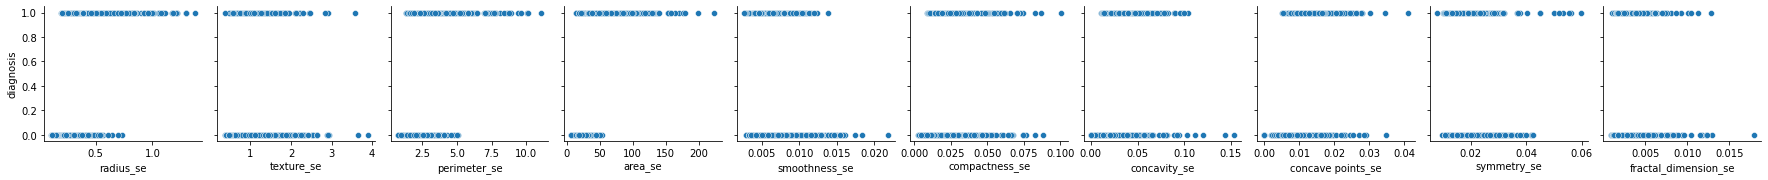

In [ ]:
#_se pairplot
sns.pairplot(data = df , x_vars =[i for i in df.columns if "_se" in i],  y_vars = ["diagnosis"]);

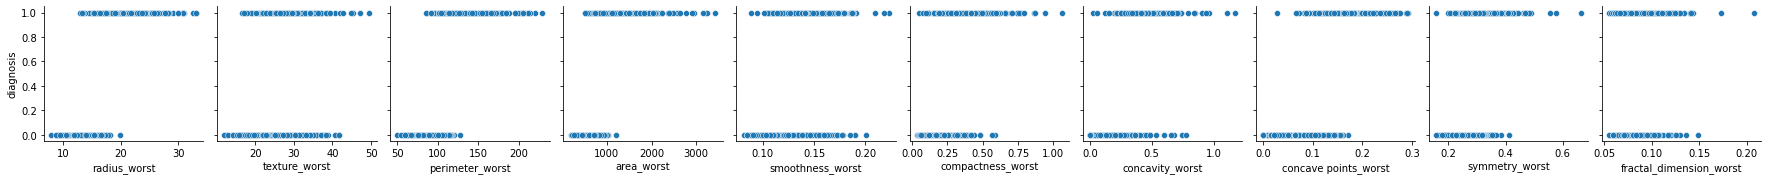

In [ ]:
#_worst pairplot
sns.pairplot(data = df , x_vars =[i for i in df.columns if "_worst" in i],  y_vars = ["diagnosis"]);

The pairplot confirm the separability between classes usually with large values leading to a malign cancer. **"area_mean", "concave_points_mean", "area_worst", "radius_worst"** seem to separate the classes very well.

Also, we can see in the _se pairplot that there are two points that are very far from each other.

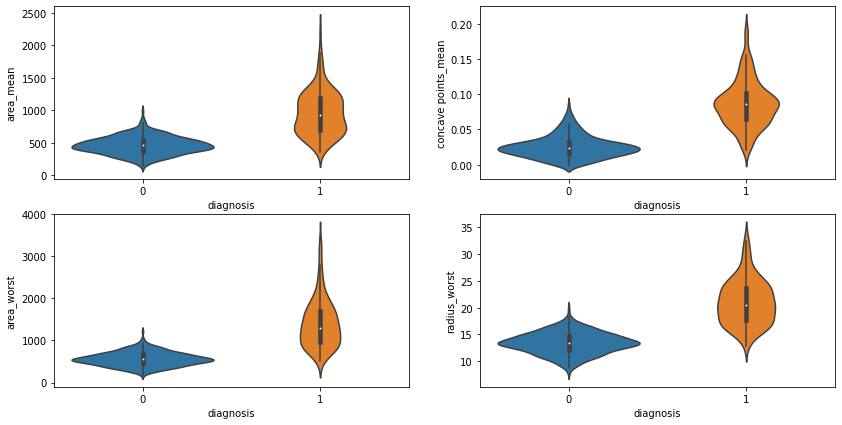

In [ ]:
to_plot = ["area_mean", "concave points_mean", "area_worst", "radius_worst"]

fig, ax = plt.subplots(2,2, figsize = (14,7))

for i, var in enumerate(to_plot):
  sns.violinplot(data = df, x = "diagnosis", y = var, ax = ax.flat[i])

Again, we can see that those features have lower median and mean to Benign and in Benign the concentration of values are in lower values

## Dealing With Outliers on _SE features

Here, I manually looked for the outliers based on pairplot

In [ ]:
df.query("radius_se > 2 and perimeter_se > 15 and area_se > 400" ).index

Int64Index([212, 461], dtype='int64')

In [ ]:
df.query("smoothness_se > 0.02 and diagnosis == 1").index

Int64Index([122, 213], dtype='int64')

In [ ]:
df.query("texture_se > 4").index

Int64Index([192], dtype='int64')

In [ ]:
df.query("compactness_se > 0.12").index

Int64Index([190], dtype='int64')

In [ ]:
df.query("concavity_se > 0.3").index

Int64Index([68, 152], dtype='int64')

In [ ]:
df[df["concave points_se"] > 0.05].index

Int64Index([152], dtype='int64')

In [ ]:
df.query("(symmetry_se > 0.06 and diagnosis == 0) or symmetry_se > 0.065" ).index

Int64Index([78, 314], dtype='int64')

In [ ]:
df.query("fractal_dimension_se > 0.02").index

Int64Index([71, 152, 290], dtype='int64')

In [ ]:
outliers = [212,461,122,192,213,190,68,152,78,314,71,152,290]

In [ ]:
df = df.drop(outliers, axis = 0)
df = df.reset_index(drop = True)

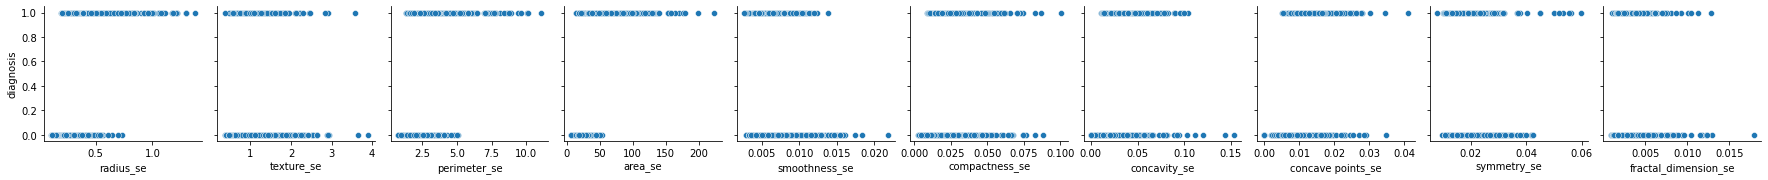

In [ ]:
# re-plot the _se pairplot
sns.pairplot(data = df , x_vars =[i for i in df.columns if "_se" in i],  y_vars = ["diagnosis"]);

## Correlation

In [ ]:
corr = abs(df.corr()['diagnosis'].sort_values(ascending = False)[1:])
corr[corr > 0.75]

concave points_worst    0.797
perimeter_worst         0.787
concave points_mean     0.784
radius_worst            0.779
Name: diagnosis, dtype: float64

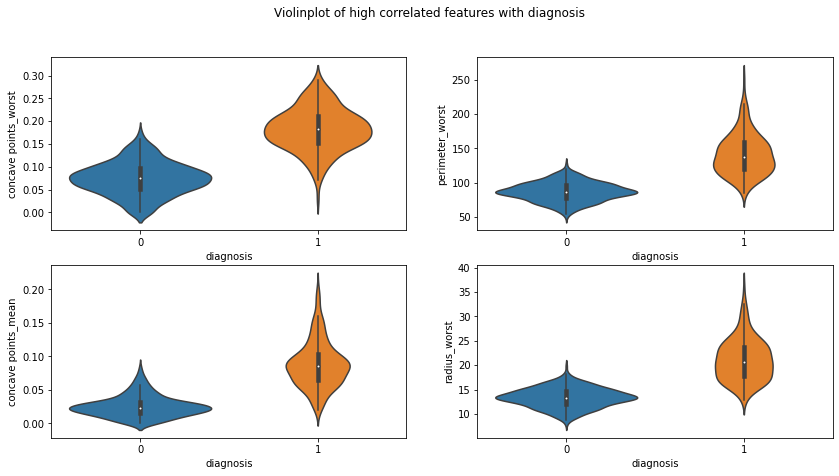

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (14,7))

for i, var in enumerate(corr[corr > 0.75].index):
  sns.violinplot(data = df, x = "diagnosis", y = var, ax = ax.flat[i])

fig.suptitle("Violinplot of high correlated features with diagnosis");

# Create a Baseline

I will create a simple baseline with logistic regression regularizated (Lasso) to deal with multicolinearity.

As lasso regularization tends to zero the coefficients without importance I will use the results to get some insights. 

The evaluation is done in a 4 fold cross validation with the choice of best regulatrization term (C) done from default options of LogisticRegressionCV class. The metric evaluated is the ROC auc since the desbalance between the classes it's not extreme.

In [ ]:
X = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, shuffle=True, stratify=y)
cv = StratifiedKFold(n_splits = 4, shuffle=True, random_state=42)

In [ ]:
#Need to scale because regularization. For that, I chained the scaller and estimator inisde a Pipeline
logit_base = LogisticRegressionCV(solver = "liblinear", cv =cv, penalty = "l1", scoring = "roc_auc", max_iter = 1000, random_state = 42) 
baseline = make_pipeline(StandardScaler(), logit_base)

In [ ]:
#need to fit to get the coeficietns and C value
baseline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregressioncv',
                 LogisticRegressionCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                                      max_iter=1000, penalty='l1',
                                      random_state=42, scoring='roc_auc',
                                      solver='liblinear'))])

In [ ]:
print(f"Baseline ROC auc: {baseline[1].scores_[1][0:,4].mean()}")
print(f"Best C: {baseline[1].C_[0]}")

Baseline ROC auc: 0.9942542444060662
Best C: 2.782559402207126


This is a very good cross validation score. We could suspect overfitting but as the validation was correctly done it is more likely that this high score is due to the linear separability of the classes Malign and Benign.

# Model Selection

I also evaluated three other models (Decision Tree, Random Forest and XGboost). 

For the first I use some arbitraty hyperparameters to prune the tree. As in random forest the trees are independent, a high number of estimators tends to more stable predictions (the bagging nature also contribute to that). This does not occur in boosting models like XGBoost, in which case the trees are trained in a subsequent way and each one learns from the mistakes of the previous one. In this case, a greater number of estimators tends to overfitting.

In [ ]:
#decision tree - prune the tree to avoid "infinite" growing
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 40, random_state= 42)
dt_cross_val = cross_val_score(dt, X_train, y_train, cv = cv, scoring = "roc_auc")

print(f"Decision Tree ROC auc: {np.mean(dt_cross_val)}")

Decision Tree ROC auc: 0.943455970480262


In [ ]:
#random forest - high n_estimators is better
rf = RandomForestClassifier(n_estimators = 1000 , random_state= 42)
rf_cross_val = cross_val_score(rf, X_train, y_train, cv = cv, scoring = "roc_auc")

print(f"Random Forest ROC auc: {np.mean(rf_cross_val)}")

Random Forest ROC auc: 0.9883828160143949


In [ ]:
#XGBoost - in opposite to Random Forest here more trees tend to overfit
xgb = xgb.XGBClassifier(n_estimators = 100, random_state = 42)
xgb_cross_val = cross_val_score(xgb, X_train, y_train, cv = cv, scoring = "roc_auc")

print(f"XGBoost ROC auc: {np.mean(rf_cross_val)}")

XGBoost ROC auc: 0.9883828160143949


Curiously none of them (including two complex ensemble models) could beat the baseline, a simple Logistic Regression. 

# Model Interpretability

As the decision tree has been pruned, it is easy to interpret the decisions made by the model.

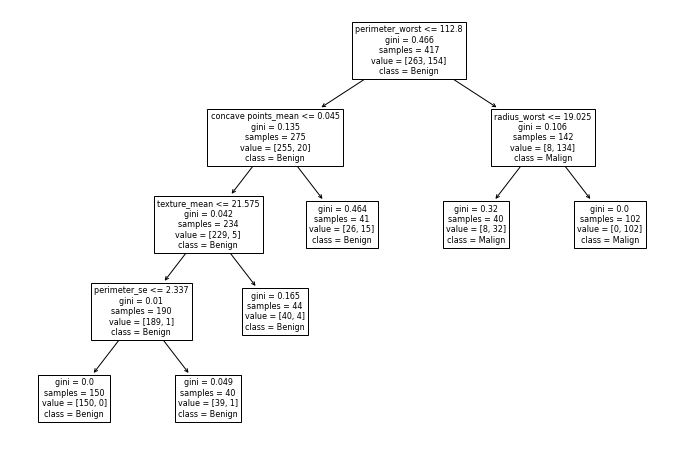

In [ ]:
#fitting estimator 
dt.fit(X_train, y_train)

#plotting the tree
feat_dt = ["perimeter_worst", "concave points_mean", "texture_mean", "concave points_worst"]
fig, ax = plt.subplots(figsize = (12,8))
plot_tree(dt, feature_names = X_train.columns, class_names = ["Benign","Malign"]);

For example, a cell with perimeter_worst >= 112.8 and a radius_worst >= 19.025 has a 100% chance of being malignant based on 102 observations from training data. 



In [ ]:
#Logistic regression Coefficients
coefs = pd.DataFrame({'features':X_train.columns,
              'coefs': abs(baseline[1].coef_[0])})

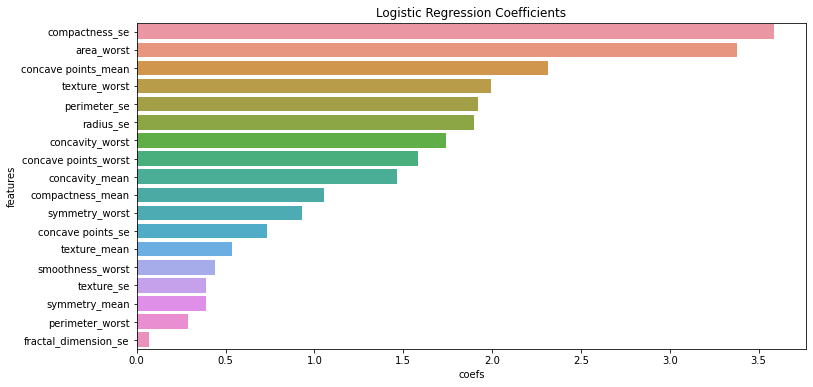

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(data = coefs.query('coefs > 0').sort_values(by = 'coefs', ascending = False),
            x='coefs',
            y='features')
ax.set_title('Logistic Regression Coefficients');

Lasso regularization zeroed the coefficients from 9 features. Logistic Regression give too much importance to compactness_se and area_worst. We can interpret this as the following: the greater the variation in compactness between different images of the same nucleus, the greater the tendency for the cancer to be malignant. The same can be said for the area measurement.

# Final Evaluation on Test

To evaluate on test I instantiated a new object from the class LogisticRegression with the C value defined latter on cross validationn and fitted it again on entire train set.

In [ ]:
logit = LogisticRegression(C=2.782559402207126, solver = "liblinear", penalty = "l1", max_iter = 1000, random_state = 42) 
final_model = make_pipeline(StandardScaler(), logit)

In [ ]:
final_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=2.782559402207126, max_iter=1000,
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [ ]:
yhat = final_model.predict(X_test)

In [ ]:
roc_auc_score(y_test, yhat)

0.9501748251748252

We successfully managed to avoid overfitting on training since the difference in the metric was not that high

In [ ]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        88
           1       0.96      0.92      0.94        52

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



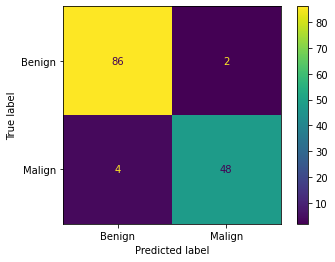

In [ ]:
cm = confusion_matrix(y_test, yhat, labels = final_model[1].classes_)
disp = ConfusionMatrixDisplay(cm,  display_labels = ['Benign','Malign'])
disp.plot();

The final result apoints to a good others metrics like f1, recall and precision for boths classes. Also, the model makes few mistakes only 4 False Negatives and 2 False Positive

# Future Perspectives

This model can be applied to help automate the diagnosis of breast cancer as it has excellent metrics, is easily interpretable and the classes are easily distinguishable.

There are some measures that can be taken to improve it:
- Treat the asymmetry in the data making them more normal. This would increase the reliability of the coefficients by improving the interpretation, although it does not affect the predictive ability.
- Here I only treat outliers on the se_ features. An alternative would be to look at the restants features.
- Optimize the model to avoid false negatives by increasing the recall of class 1. This is important because this type of error is very harmful (model identifies as benign when in fact it is malignant)